In [3]:
#!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

sns.set_style('darkgrid')

In [6]:
metrics_dir = '../new_metrics'
filenames = os.listdir(metrics_dir)

filenames

['v2v-t1_augm_3d-diffusion_sphere_masks@fold-2_dice.csv',
 'v2v-t1_augm_i2sb_sphere_masks@fold-0_dice.csv',
 'v2v-t1_augm_generated_mri_smoothing_1@fold-0_dice.csv',
 'v2v-t1_augm_i2sb_sphere_masks@fold-1_dice.csv',
 'v2v-t1_augm_3d-diffusion_sphere_masks@fold-1_coverage.csv',
 'v2v-t1_augm_3d-diffusion_3dunet_masks_new@fold-2_dice.csv',
 'v2v-t1_augm_generated_mri_smoothing_1@fold-2_coverage.csv',
 'v2v-t1_augm_generated_mri_smoothing_1@fold-2_dice.csv',
 'v2v-t1_augm_i2sb_3dunet_masks_new@fold-2_coverage.csv',
 'v2v-t1_augm_i2sb_3dunet_masks_new@fold-2_dice.csv',
 'v2v-t1_augm_generated_mri_smoothing_1@fold-1_covearge.csv',
 'v2v-t1_augm_generated_mri_smoothing_1@fold-1_dice.csv',
 'v2v-t1_augm_3d-diffusion_sphere_masks@fold-2_coverage.csv',
 'v2v-t1_augm_3d-diffusion_sphere_masks@fold-1_dice.csv',
 'v2v-t1_augm_3d-diffusion_3dunet_masks_new@fold-2_coverage.csv',
 'v2v-t1_noaugm@fold-0_dice.csv',
 'v2v-t1_augm_3d-diffusion_3dunet_masks_new@fold-1_covearge.csv',
 'v2v-t1_noaugm@fold-2

In [45]:
def draw_metrics(data, labels, title):
    plt.figure(figsize=(15, 7))
    for arr, label in zip(data, labels):
        arr = np.array(arr)[:400].reshape(-1, 50).mean(axis=1)
        epochs = np.linspace(0, 500, len(arr))
        plt.plot(epochs, arr, label=label)
        plt.xlabel('Epochs')
        plt.ylabel(title)

    plt.title(title)
    plt.legend()
    plt.show()

In [52]:
coverage_filenames = [filename for filename in filenames if '2_coverage' in filename]
dice_filenames = list(reversed([filename for filename in filenames if '2_dice' in filename]))

coverage_data = [list(pd.read_csv(os.path.join(metrics_dir, filename))['Value']) for filename in sorted(coverage_filenames)]
dice_data = [list(pd.read_csv(os.path.join(metrics_dir, filename))['Value']) for filename in sorted(dice_filenames)]

In [32]:
len(dice_data[3])

443

In [39]:
sorted(coverage_filenames), sorted(dice_filenames)

(['v2v-t1_augm_3d-diffusion_3dunet_masks_new@fold-2_coverage.csv',
  'v2v-t1_augm_3d-diffusion_sphere_masks@fold-2_coverage.csv',
  'v2v-t1_augm_generated_mri_smoothing_1@fold-2_coverage.csv',
  'v2v-t1_augm_i2sb_3dunet_masks_new@fold-2_coverage.csv',
  'v2v-t1_augm_i2sb_sphere_masks@fold-2_coverage.csv',
  'v2v-t1_noaugm@fold-2_coverage.csv'],
 ['v2v-t1_augm_3d-diffusion_3dunet_masks_new@fold-2_dice.csv',
  'v2v-t1_augm_3d-diffusion_sphere_masks@fold-2_dice.csv',
  'v2v-t1_augm_generated_mri_smoothing_1@fold-2_dice.csv',
  'v2v-t1_augm_i2sb_3dunet_masks_new@fold-2_dice.csv',
  'v2v-t1_augm_i2sb_sphere_masks@fold-2_dice.csv',
  'v2v-t1_noaugm@fold-2_dice.csv'])

In [53]:
coverage_labels = ['3D-Diffusion 3dunet masks', '3D-Diffusion sphere masks', 'Smoothing', 
                   'I2SB 3dunet masks', 'I2SB sphere masks', 'No augmentations']
dice_labels = coverage_labels

coverage_title = 'Coverage'
dice_title = 'Dice'

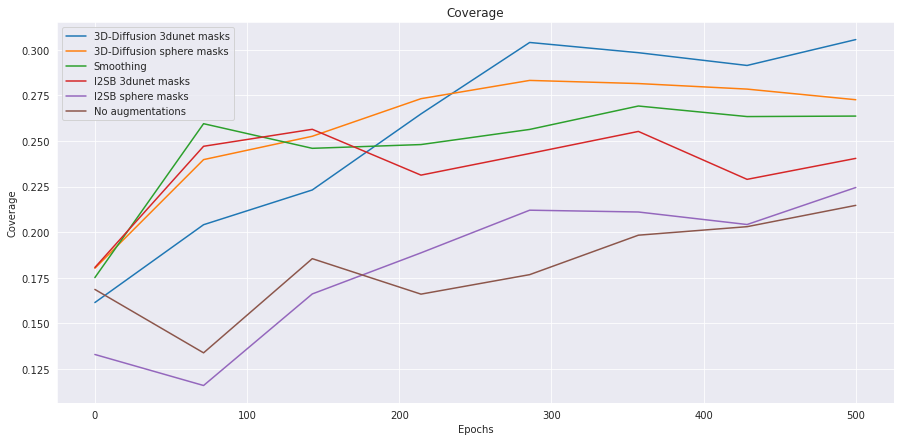

In [54]:
draw_metrics(coverage_data, coverage_labels, coverage_title)

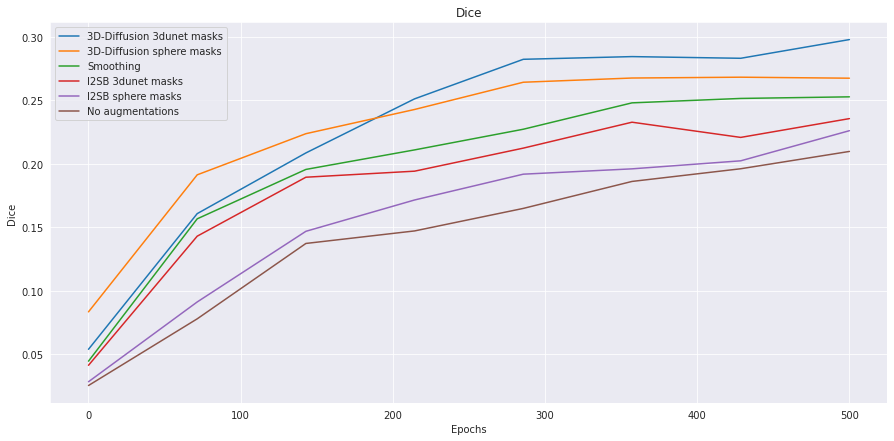

In [56]:
draw_metrics(dice_data, dice_labels, dice_title)